# ENCH 470 Fall 2020 Lecture 11: Introduction to cheminformatics

## Check out Cheminformatics Introduction by Jeremy Yang

Check this out! **Required asynchronous content** - learn the basics of the field of cheminformatics in a great, brief video

https://www.youtube.com/watch?v=yM0ums_ur78

## Today: Introduction to RDKit

Based on original notebook by Andrea Volkamer, https://github.com/volkamerlab/TeachOpenCADD

#### Basic handling of molecules

* Reading & writing of molecules
* Molecular descriptors & fingerprints
* Molecular similarity

#### Using RDKit: open source cheminformatics software

More information can be found here:

* http://www.rdkit.org/docs/index.html
* http://www.rdkit.org/docs/api/index.html

In [1]:
# The majority of the basic molecular functionality is found in module rdkit.Chem library
from rdkit import Chem
from rdkit.Chem import AllChem

## Representation of molecules

### SMILES (Simplified Molecular Input Line Entry Specification)

* Atoms are represented by atomic symbols: C, N, O, F, S, Cl, Br, I
* Double bonds are `=`, triple bonds are `#`
* Branching is indicated by parenthesis
* Ring closures are indicated by pairs of matching digits
* No hydrogens are included explicitly; they are inferred based on valence and connectivity

More information can be found here: http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html

In [2]:
# Individual molecules can be constructed using a variety of approaches
# FDA approved EGFR inhibitors: Gefitinib, Erlotinib

mol1 = Chem.MolFromSmiles('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1')
mol2 = Chem.MolFromSmiles('C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1')

#### Drawing molecules

In [3]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

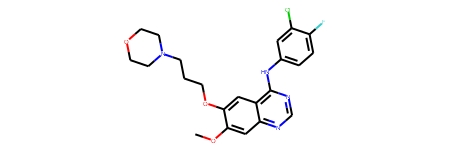

In [4]:
# Single molecule
mol1

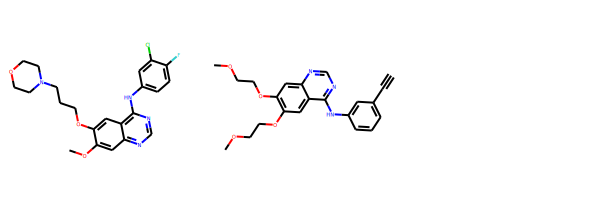

In [5]:
# List of molecules
Draw.MolsToGridImage([mol1,mol2], useSVG=True)

**<font color=red> Problem: </font>** The SMILES string for hexane is 'cccccc' and the SMILES string for cyclohexane is 'C1CCCCC1'. Write a loop to create two lists of SMILES strings, one for methane through decane, and one for cyclopropane through cyclodecane.

In [6]:
alkane = []
for i in range(12):
    string = 'C'
    for j in range(i):
        string = string + 'C'
    alkane.append(string)
print(alkane)

cycloalkane = []
for i in range(2,12):
    string = 'C1'
    for j in range(i-1):
        string = string + 'C'
    string = string + 'C1'
    cycloalkane.append(string)
print(cycloalkane)


['C', 'CC', 'CCC', 'CCCC', 'CCCCC', 'CCCCCC', 'CCCCCCC', 'CCCCCCCC', 'CCCCCCCCC', 'CCCCCCCCCC', 'CCCCCCCCCCC', 'CCCCCCCCCCCC']
['C1CC1', 'C1CCC1', 'C1CCCC1', 'C1CCCCC1', 'C1CCCCCC1', 'C1CCCCCCC1', 'C1CCCCCCCC1', 'C1CCCCCCCCC1', 'C1CCCCCCCCCC1', 'C1CCCCCCCCCCC1']


**<font color=red> Problem: </font>** Convert your lists of alkanes into lists of RDKit molecule objects, and then display a grid for each of these.

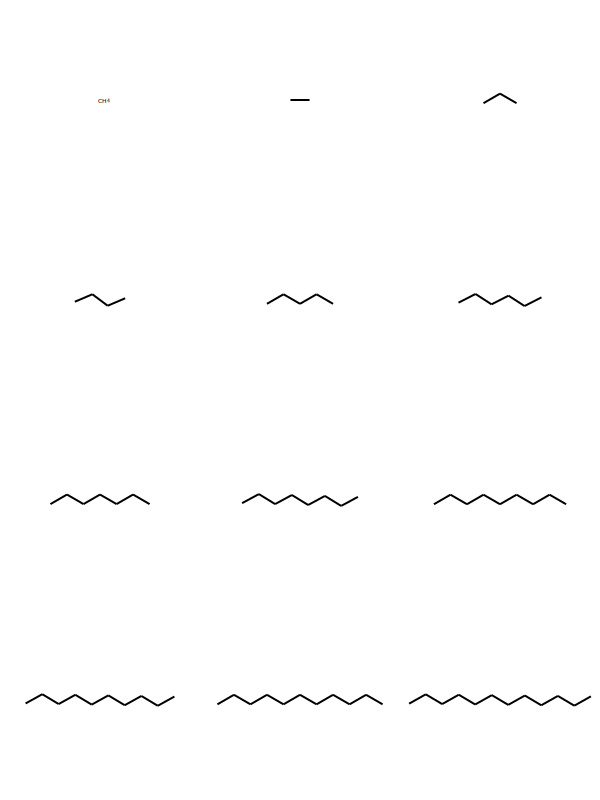

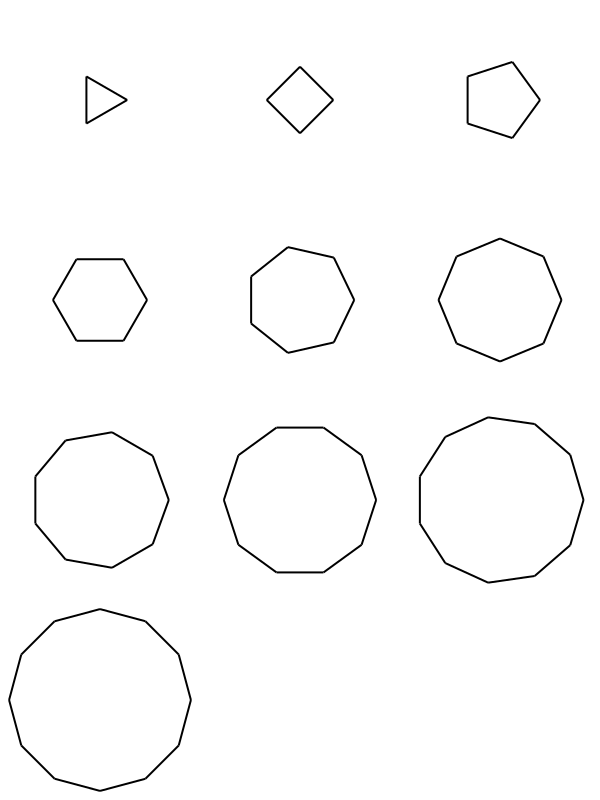

In [7]:
SMILES_alkane = []
SMILES_cycloalkane = []

for i in range(len(alkane)):
    SMILES_alkane.append(Chem.MolFromSmiles(alkane[i]))

for i in range(len(cycloalkane)):
    SMILES_cycloalkane.append(Chem.MolFromSmiles(cycloalkane[i]))
    
draw1 = Draw.MolsToGridImage(SMILES_alkane, useSVG=True) 
draw2 = Draw.MolsToGridImage(SMILES_cycloalkane, useSVG=True) 
display(draw1)
display(draw2)

#### Molecule representation

In [8]:
# Molecule representation
print(Chem.MolToMolBlock(mol1))


     RDKit          2D

 31 34  0  0  0  0  0  0  0  0999 V2000
    0.7500   -6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -5.1962    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500    3.8971    0

### Generating 3D coordinates

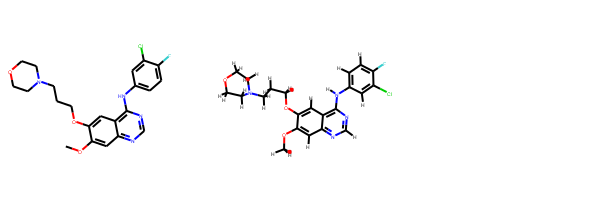

In [9]:
m_3D = Chem.AddHs(mol1)
AllChem.EmbedMolecule(m_3D)
Draw.MolsToGridImage([mol1,m_3D])

In [10]:
print(Chem.MolToMolBlock(m_3D))


     RDKit          3D

 55 58  0  0  0  0  0  0  0  0999 V2000
   -1.3414   -4.7827    1.0949 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3168   -3.3808    0.8324 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0695   -2.7482    0.7510 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1034   -3.4463    0.9172 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3372   -2.8159    0.8355 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4675   -3.5255    1.0033 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.6853   -2.9444    0.9314 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.7858   -1.6279    0.6872 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.7070   -0.8444    0.5069 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8417    0.5337    0.2722 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.0440    1.2699    0.1522 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.0146    2.6733    0.2528 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.1343    3.4474    0.1303 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.3474    2.8159   -0

### Writing molecules to *sdf* (structure data files)

In [11]:
w = Chem.SDWriter('mytest_mol3D.sdf')
w.write(m_3D)
w.close()

### Descriptors

#### Molecular descriptors (global)

In [12]:
from rdkit.Chem import Descriptors

In [13]:
print ('Heavy atoms:', Descriptors.HeavyAtomCount(mol1))
print ('H-bond donors:', Descriptors.NumHDonors(mol1))
print ('H-bond acceptors:', Descriptors.NumHAcceptors(mol1))
print ('Molecular weight:', Descriptors.MolWt(mol1))
print ('LogP:', Descriptors.MolLogP(mol1))

Heavy atoms: 31
H-bond donors: 1
H-bond acceptors: 7
Molecular weight: 446.9100000000004
LogP: 4.275600000000003


In [14]:
print ('Heavy atoms:', Descriptors.HeavyAtomCount(mol2))
print ('H-bond donors:', Descriptors.NumHDonors(mol2))
print ('H-bond acceptors:', Descriptors.NumHAcceptors(mol2))
print ('Molecular weight:', Descriptors.MolWt(mol2))
print ('LogP:', Descriptors.MolLogP(mol2))

Heavy atoms: 29
H-bond donors: 1
H-bond acceptors: 7
Molecular weight: 393.4430000000002
LogP: 3.405100000000002


#### Better descriptors: Molecular fingerprints

The field of cheminformatics has defined a number of ways to make a "fingerprint" or a "bar code" to represent molecules in a general way. Morgan Fingerprints are a popular set of descriptors.

Learn more about them here (and find more code examples to play with and learn more): https://www.rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints

Let's take a look at the Morgan Fingerprints of radius 2 (MFP2).

In [15]:
from rdkit.Chem import rdFingerprintGenerator

fp1 = rdFingerprintGenerator.GetFPs([mol1])
fp2 = rdFingerprintGenerator.GetFPs([mol2])


In [16]:
fp1[0].ToBitString()
# "Bar code" or "Fingerprint" of Gefitinib

'000000000000010000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000100000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000100000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000101000000000000000000000000000000010000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001001000000000000000010000000000000000000001000100000000100000000000000000000000000000000000000100000000000000000000000000000000100000000000001000000000000000000000000000000000000000000000010100000000000000000000000000000001000000000000100000000000000000000000000000000000001000000001000000000000001000000000000000000000000000000000000000000000000

In [17]:
fp2[0].ToBitString()

'000000000000010000000000000000000000000000000000000000000000000000000000000000001000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100101000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011010000000000000000001000000010000100000000000000000000000000000000000000100000000000000000000000000000000100000000000001000000000000000000000000000000000000000000000010000000000000000000000000000000001000000000000100001000000000000000000000100000000000000000000000000000000000000000000000000000000001000000000000000000000000

Visualizing the descriptor

### Molecular similarity

Let's compare these two molecules! Since each is now represented as a vector, we can quantitatively compare how similar their structures are. For example, the Tanimoto similarity metric considers how many of the structural descriptors are shared between the two molecules.

$Similarity = \frac{N_{features}^{shared}}{(N_{features}^1 + N_{features}^2 - N_{features}^{shared})}$

In [18]:
from rdkit import DataStructs

In [19]:
# Tanimoto similarity
commonBits = fp1[0]&fp2[0]
print('fp1:',fp1[0].GetNumOnBits(),'fp2:',fp2[0].GetNumOnBits(),'num in common:',commonBits.GetNumOnBits())
print(commonBits.GetNumOnBits()/(fp1[0].GetNumOnBits()+fp2[0].GetNumOnBits()-commonBits.GetNumOnBits()))
print('Tanimoto:', DataStructs.TanimotoSimilarity(fp1[0],fp2[0]))

fp1: 60 fp2: 47 num in common: 31
0.40789473684210525
Tanimoto: 0.40789473684210525


**<font color=red> Problem: </font>** Show that similarity = 1 when comparing a molecule to itself

In [23]:
# Tanimoto similarity of fp1 to fp1
commonBits = fp1[0]&fp1[0]
print('fp1:',fp1[0].GetNumOnBits(),'fp1:',fp1[0].GetNumOnBits(),'num in common:',commonBits.GetNumOnBits())
print(commonBits.GetNumOnBits()/(fp1[0].GetNumOnBits()+fp1[0].GetNumOnBits()-commonBits.GetNumOnBits()))
print('Tanimoto:', DataStructs.TanimotoSimilarity(fp1[0],fp1[0]))


fp1: 60 fp1: 60 num in common: 60
1.0
Tanimoto: 1.0


**<font color=red> Problem: </font>** What is the Tanimoto similarity between pentane and cyclopentane? 

What is the Tanimoto similarity between decane and cyclodecane? 

What is the Tanimoto similarity between cyclopentane and decane?

Tanimoto between pentane and cyclopentane: 0.0
Tanimoto between decane and cyclodecane: 0.0
Tanimoto similarity between cyclopentane and decane 0.0


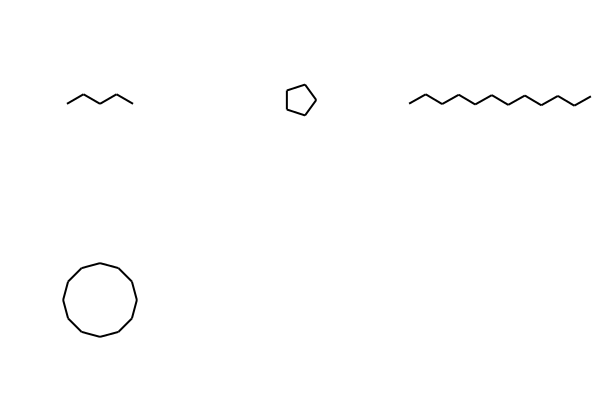

In [21]:
pentane = SMILES_alkane[4]
cyclopentane = SMILES_cycloalkane[2]
fp_pentane = rdFingerprintGenerator.GetFPs([pentane])
fp_cyclopentane = rdFingerprintGenerator.GetFPs([cyclopentane])
print('Tanimoto between pentane and cyclopentane:', DataStructs.TanimotoSimilarity(fp_pentane[0],fp_cyclopentane[0]))

decane = SMILES_alkane[11]
cyclodecane = SMILES_cycloalkane[9]
fp_decane = rdFingerprintGenerator.GetFPs([decane])
fp_cyclodecane = rdFingerprintGenerator.GetFPs([cyclodecane])
print('Tanimoto between decane and cyclodecane:', DataStructs.TanimotoSimilarity(fp_decane[0],fp_cyclodecane[0]))

print('Tanimoto similarity between cyclopentane and decane',DataStructs.TanimotoSimilarity(fp_decane[0],fp_cyclopentane[0]))

#Checking molecules
Draw.MolsToGridImage([pentane,cyclopentane,decane,cyclodecane], useSVG=True) 